11. Build the LeNet-5 architecture using Keras and train it on the MNIST dataset. Evaluate the model accuracy.

In [2]:
# ----------------------------
# 1. Import required libraries
# ----------------------------
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [3]:
# ----------------------------
# 2. Load and preprocess MNIST dataset
# ----------------------------
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

# Reshape to (28,28,1) and normalize to [0,1]
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
# ----------------------------
# 3. Define LeNet-5 model architecture
# ----------------------------
model = models.Sequential([
    # Layer 1: Convolution + Activation
    layers.Conv2D(6, kernel_size=(5,5), activation='tanh', input_shape=(28,28,1), padding='same'),
    layers.AveragePooling2D(pool_size=(2,2), strides=2),

    # Layer 2: Convolution + Activation
    layers.Conv2D(16, kernel_size=(5,5), activation='tanh'),
    layers.AveragePooling2D(pool_size=(2,2), strides=2),

    # Layer 3: Flatten
    layers.Flatten(),

    # Layer 4: Fully Connected
    layers.Dense(120, activation='tanh'),

    # Layer 5: Fully Connected
    layers.Dense(84, activation='tanh'),

    # Output Layer: 10 neurons (digits 0–9)
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
# ----------------------------
# 4. Compile the model
# ----------------------------
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [6]:
# ----------------------------
# 5. Display model summary
# ----------------------------
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 14, 14, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 10, 10, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 5, 5, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 120)            │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61,706 (241.04 KB)

 Trainable params: 61,706 (241.04 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# ----------------------------
# 6. Train the model
# ----------------------------
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=128,
    validation_data=(x_test, y_test)
)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 22s 45ms/step - accuracy: 0.8168 - loss: 0.6273 - val_accuracy: 0.9559 - val_loss: 0.1500
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 22s 46ms/step - accuracy: 0.9587 - loss: 0.1388 - val_accuracy: 0.9697 - val_loss: 0.0996
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 40s 45ms/step - accuracy: 0.9761 - loss: 0.0815 - val_accuracy: 0.9778 - val_loss: 0.0684
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 42s 47ms/step - accuracy: 0.9818 - loss: 0.0599 - val_accuracy: 0.9780 - val_loss: 0.0634
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 21s 45ms/step - accuracy: 0.9859 - loss: 0.0469 - val_accuracy: 0.9825 - val_loss: 0.0541
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 44ms/step - accuracy: 0.9897 - loss: 0.0341 - val_accuracy: 0.9826 - val_loss: 0.0544
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 44ms/step - accuracy: 0.9909 - loss: 0.0295 - val_accuracy: 0.9859 - val_loss: 0.0429
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 23s 49ms/step - accuracy: 0.9931 - loss: 0.0231 - 

In [8]:
# ----------------------------
# 7. Evaluate the model
# ----------------------------
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"✅ Test Accuracy: {test_acc:.4f}")

313/313 - 2s - 8ms/step - accuracy: 0.9847 - loss: 0.0499
✅ Test Accuracy: 0.9847


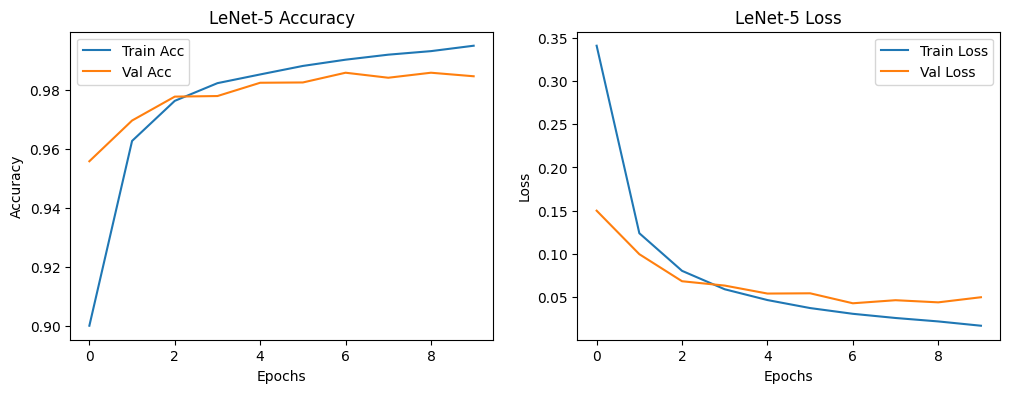

In [9]:
# ----------------------------
# 8. Plot training accuracy and loss
# ----------------------------
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('LeNet-5 Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('LeNet-5 Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
